In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')
fashion_test_df  = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [68]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')
training.shape

(60000, 785)

3.0

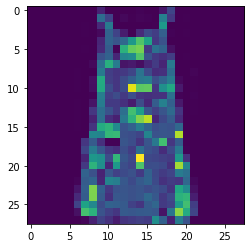

In [28]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i, 0]
label


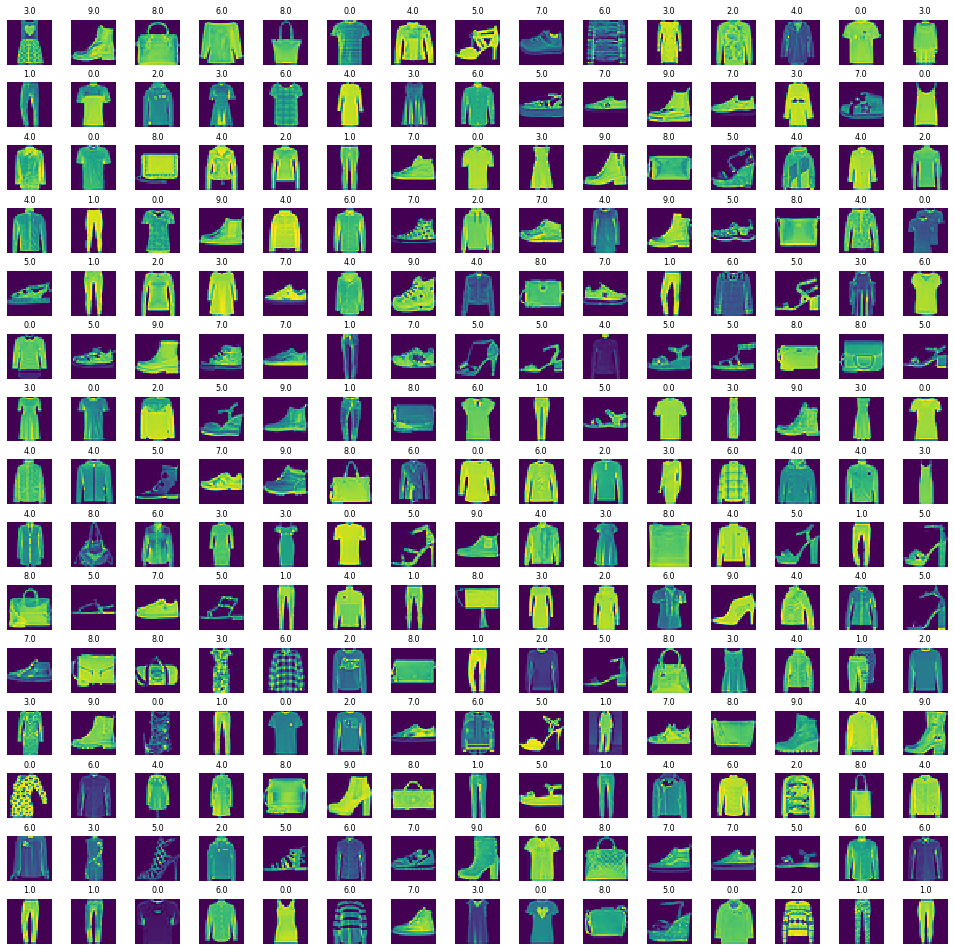

In [70]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid, figsize = (17,17))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, w_grid*l_grid):
    
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [71]:
import tensorflow as tf


In [72]:
x_train = training[:, 1:]/255
y_train = training[:, 0]

In [73]:
x_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [76]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_val = x_val.reshape(x_val.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))

In [77]:
x_train.shape

(48000, 28, 28, 1)

In [78]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [79]:
model = Sequential()
model.add(Conv2D(64,3,3, input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())

model.add(Dense(output_dim = 64, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(output_dim = 32, activation = 'relu'))
model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/Users/sahana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
/Users/sahana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  
/Users/sahana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  
/Users/sahana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  if __name__ == '__main__':


In [80]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [81]:
epochs = 50

In [82]:
model.fit(x_train, 
          y_train,
          batch_size = 512,
          nb_epoch = epochs,
          verbose = 1,
          validation_data = (x_val, y_val))

/Users/sahana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 17s 346us/step - loss: 1.0686 - accuracy: 0.6127 - val_loss: 0.5264 - val_accuracy: 0.8065
Epoch 2/50
48000/48000 [==============================] - 15s 319us/step - loss: 0.5507 - accuracy: 0.8044 - val_loss: 0.4210 - val_accuracy: 0.8459
Epoch 3/50
48000/48000 [==============================] - 16s 330us/step - loss: 0.4615 - accuracy: 0.8398 - val_loss: 0.3729 - val_accuracy: 0.8676
Epoch 4/50
48000/48000 [==============================] - 16s 338us/step - loss: 0.4107 - accuracy: 0.8583 - val_loss: 0.3471 - val_accuracy: 0.8752
Epoch 5/50
48000/48000 [==============================] - 17s 345us/step - loss: 0.3768 - accuracy: 0.8686 - val_loss: 0.3232 - val_accuracy: 0.8863
Epoch 6/50
48000/48000 [==============================] - 17s 345us/step - loss: 0.3520 - accuracy: 0.8762 - val_loss: 0.3123 - val_accuracy: 0.8876
Epoch 7/50
48000/48000 [==============================] 

In [83]:
evaluation = model.evaluate(x_test, y_test)
print('Test accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 114us/step
Test accuracy : 0.923


In [84]:
predicted_classes = model.predict_classes(x_test)

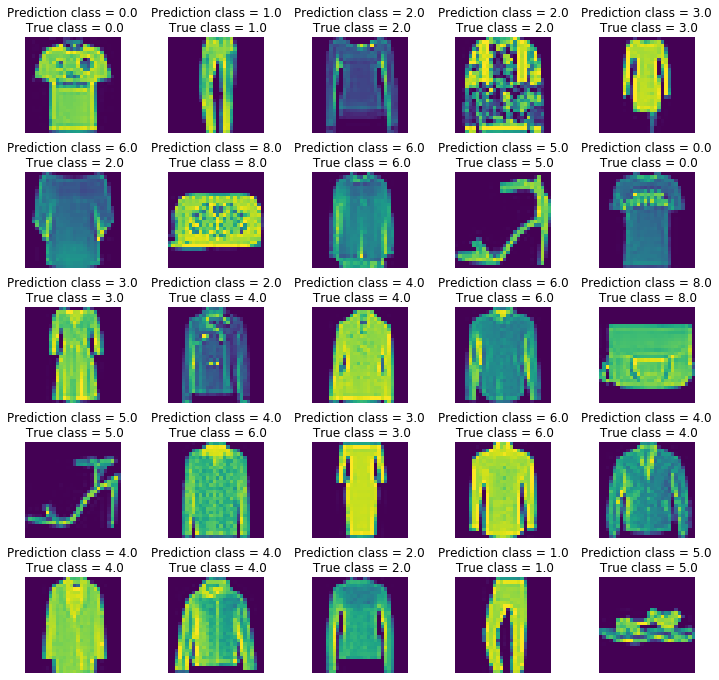

In [85]:
l = 5
w = 5

fig, axes = plt.subplots(l, w, figsize = (12, 12))

axes = axes.ravel()

for i in np.arange(0, l*w):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("Prediction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)
    


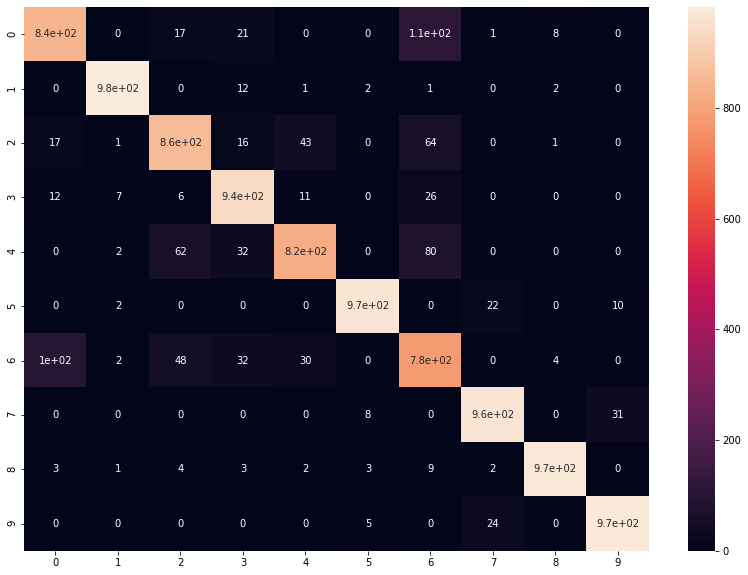

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [86]:
from sklearn.metrics import classification_report
 
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.89      0.87      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.87      0.88      0.88      1000
     Class 3       0.94      0.94      0.94      1000
     Class 4       0.90      0.89      0.90      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.80      0.74      0.77      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

